# Is U.S. College Worth the Cost?

### Data Questions:

**This notebook utilizes the x dataset to answer the questions:**
* Question 1: Do male students earn more than female students who graduate from the same university?
* Question 2:  How are different demographics impacted by debt? 

### Overview
Over the past two decades, college tuition pricing has increased more than any other good or service in the US besides hospital services, outstripping average inflation by 3x. This has impacted the affordability of education and led to an increase in student debt load to record highs. These trends have also given rise to many fundamental questions such as: “Is college worth the cost?”. 

In this notebook we aim to provide data-driven insights into the current state of U.S. colleges by analyzing the cost of attendance as well as student’s financial debt and potential earnings after graduation.


### Resource Links

**GitHub repository:**  https://github.com/UC-Berkeley-I-School/Project2_Kenney_Rueda_Higgins
 
**Dataset:**  https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Institution_09012022.zip

**Source:**  U.S. College data by Institution: https://collegescorecard.ed.gov/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uni_df_raw = pd.read_csv(r'../Most-Recent-Cohorts-Institution.csv')

/var/folders/ml/rjys89jx2qq2zff12rc24yh40000gn/T/ipykernel_26392/2597709083.py:1: DtypeWarning: Columns (9,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,6

In [3]:
print(len(uni_df_raw))
uni_df_raw.head()

6681


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0


### Keep only variables of interest
INSTNM, MD_EARN_WNE_MALE0_P10, MD_EARN_WNE_MALE1_P10, DEBT_MDN, GRAD_DEBT_MDN and a number of demographic variables such as race (e.g., UGDS_BLACK), sex (e.g., FEMALE), age (e.g., UG25ABV), origins (e.g., UG_NRA, FIRST_GEN) and others (e.g., MARRIED)

In [4]:
uni = uni_df_raw.filter(['INSTNM', 'CONTROL', 'MD_EARN_WNE_MALE0_P10', 'MD_EARN_WNE_MALE1_P10', 'MD_EARN_WNE_P10', 
                         'DEBT_MDN', 'MALE_DEBT_MDN', 'FEMALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN',
                         'UGDS', 'UGDS_MEN', 'UGDS_WOMEN'], 
                        axis=1)
uni.head()

,INSTNM,CONTROL,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10,MD_EARN_WNE_P10,DEBT_MDN,MALE_DEBT_MDN,FEMALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,UGDS,UGDS_MEN,UGDS_WOMEN
0,Alabama A & M University,1,36050.0,36377.0,36339.0,15250,14500,16500,15060,16000,5090.0,0.3978,0.6022
1,University of Alabama at Birmingham,1,42007.0,56164.0,46990.0,15085,15000,15250,15250,15000,13549.0,0.3816,0.6184
2,Amridge University,2,32311.0,49599.0,37895.0,10984,12500,10500,11058,10500,298.0,0.2886,0.7114
3,University of Alabama in Huntsville,1,45170.0,66070.0,54361.0,14000,13043,14896,14002,13805,7825.0,0.5891,0.4109
4,Alabama State University,1,29836.0,35315.0,32084.0,17500,15000,18500,17500,15864,3603.0,0.3605,0.6395


In [5]:
uni.index = uni.INSTNM
uni.drop('INSTNM', axis=1, inplace=True)
uni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6681 entries, Alabama A & M University to Pennsylvania State University-Penn State Brandywine
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CONTROL                6681 non-null   int64  
 1   MD_EARN_WNE_MALE0_P10  4798 non-null   float64
 2   MD_EARN_WNE_MALE1_P10  4145 non-null   float64
 3   MD_EARN_WNE_P10        5025 non-null   float64
 4   DEBT_MDN               6358 non-null   object 
 5   MALE_DEBT_MDN          6358 non-null   object 
 6   FEMALE_DEBT_MDN        6358 non-null   object 
 7   FIRSTGEN_DEBT_MDN      6358 non-null   object 
 8   NOTFIRSTGEN_DEBT_MDN   6358 non-null   object 
 9   UGDS                   5840 non-null   float64
 10  UGDS_MEN               5840 non-null   float64
 11  UGDS_WOMEN             5840 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 678.5+ KB


In [6]:
kwargs={'errors': 'coerce'}
uni = uni.apply(pd.to_numeric, **kwargs)
uni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6681 entries, Alabama A & M University to Pennsylvania State University-Penn State Brandywine
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CONTROL                6681 non-null   int64  
 1   MD_EARN_WNE_MALE0_P10  4798 non-null   float64
 2   MD_EARN_WNE_MALE1_P10  4145 non-null   float64
 3   MD_EARN_WNE_P10        5025 non-null   float64
 4   DEBT_MDN               5422 non-null   float64
 5   MALE_DEBT_MDN          4307 non-null   float64
 6   FEMALE_DEBT_MDN        4307 non-null   float64
 7   FIRSTGEN_DEBT_MDN      4448 non-null   float64
 8   NOTFIRSTGEN_DEBT_MDN   4448 non-null   float64
 9   UGDS                   5840 non-null   float64
 10  UGDS_MEN               5840 non-null   float64
 11  UGDS_WOMEN             5840 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 678.5+ KB


uni = uni.convert_dtypes().to_numeric({'MD_EARN_WNE_MALE0_P10': 'float64',
                 'MD_EARN_WNE_MALE1_P10': 'float64',
                 'MD_EARN_WNE_P10': 'float64',
                 'DEBT_MDN': 'float64',
                 'GRAD_DEBT_MDN': 'float64',
                 'MALE_DEBT_MDN': 'float64',
                 'FEMALE_DEBT_MDN': 'float64'})

In [7]:
# percentage of null values per column
uni.isnull().sum() * 100 / len(uni)

CONTROL                   0.000000
MD_EARN_WNE_MALE0_P10    28.184404
MD_EARN_WNE_MALE1_P10    37.958389
MD_EARN_WNE_P10          24.786709
DEBT_MDN                 18.844484
MALE_DEBT_MDN            35.533603
FEMALE_DEBT_MDN          35.533603
FIRSTGEN_DEBT_MDN        33.423140
NOTFIRSTGEN_DEBT_MDN     33.423140
UGDS                     12.587936
UGDS_MEN                 12.587936
UGDS_WOMEN               12.587936
dtype: float64

# Answering Questions

## Question 1: Do male students earn more than female students who graduate from the same university?

'MD_EARN_WNE_MALE0_P10', 'MD_EARN_WNE_MALE1_P10', 

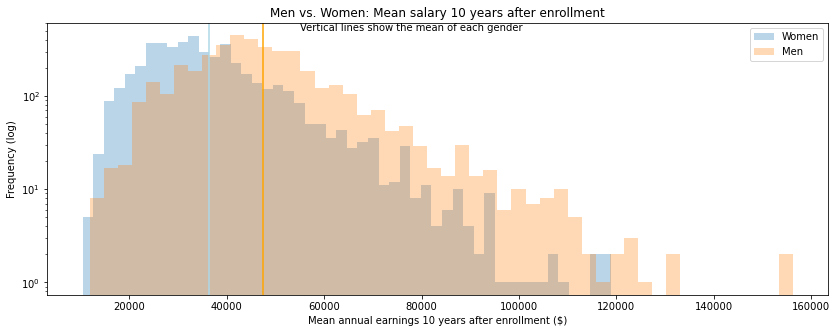

In [8]:
fig, ax = plt.subplots(figsize=(14,5))
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=50)
ax.hist(uni.MD_EARN_WNE_MALE0_P10, label = 'Women', **kwargs)
ax.hist(uni.MD_EARN_WNE_MALE1_P10, label = 'Men', **kwargs)
ax.axvline(uni.MD_EARN_WNE_MALE0_P10.mean(), color = 'lightblue')
ax.axvline(uni.MD_EARN_WNE_MALE1_P10.mean(), color = 'orange')
#ax.set_ylim(0.7,8000)
ax.text(55000, 500, 'Vertical lines show the mean of each gender')
ax.set_title('Men vs. Women: Mean salary 10 years after enrollment')
ax.set_xlabel('Mean annual earnings 10 years after enrollment ($)')
ax.set_ylabel('Frequency (log)')
plt.yscale('log')
ax.legend()

Filter out all universities with fewer then 100 men or women.

In [9]:
uni['MD_EARN_MF_DIFF'] = uni.MD_EARN_WNE_MALE1_P10 - uni.MD_EARN_WNE_MALE0_P10
#uni['MD_EARN_MF_DIFF'] = 
#uni.MD_EARN_MF_DIFF.sort_values(ascending=False).head(15)
uni_mixed_gender = uni[((uni.UGDS_WOMEN*uni.UGDS > 100) & (uni.UGDS_MEN*uni.UGDS > 100))]
len(uni_mixed_gender)

2928

Text(0, 0.5, 'Frequency')

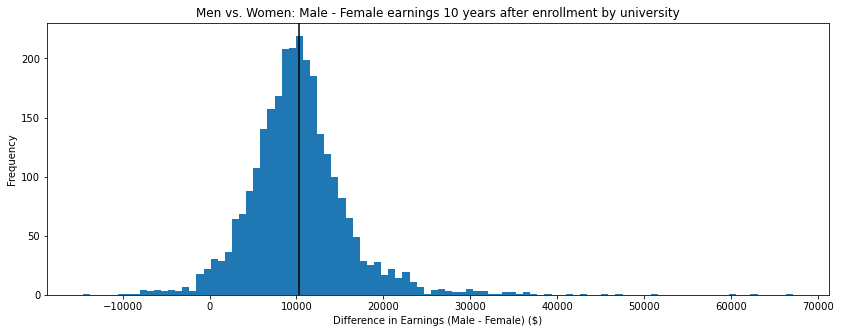

In [10]:
fig, ax = plt.subplots(figsize=(14,5))
ax.hist(uni_mixed_gender.MD_EARN_MF_DIFF, bins=100)
ax.axvline(uni_mixed_gender.MD_EARN_MF_DIFF.mean(), color='k')
ax.set_title('Men vs. Women: Male - Female earnings 10 years after enrollment by university')
ax.set_xlabel('Difference in Earnings (Male - Female) ($)') 
ax.set_ylabel('Frequency')

Text(165000, 145000, 'M.I.T.')

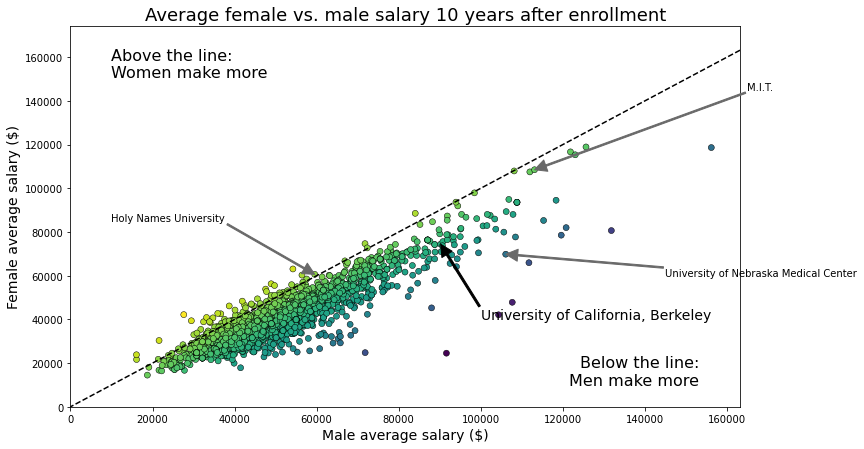

In [11]:
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(data=uni_mixed_gender, x='MD_EARN_WNE_MALE1_P10', y='MD_EARN_WNE_MALE0_P10', 
                hue='MD_EARN_MF_DIFF', palette='viridis_r', edgecolor='k', hue_norm=(uni_mixed_gender.MD_EARN_MF_DIFF.min(),uni_mixed_gender.MD_EARN_MF_DIFF.max()), 
                legend=False)
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_ylim(0,ax.get_ylim()[1]+50000)
x = np.linspace(ax.get_xlim(), 2)
ax.plot(x, x, '--k')
ax.set_title('Average female vs. male salary 10 years after enrollment', fontsize=18)
ax.set_xlabel('Male average salary ($)', fontsize=14)
ax.set_ylabel('Female average salary ($)', fontsize=14)
ax.text(10000, ax.get_ylim()[1]-10000, 'Above the line:\nWomen make more', va='top', fontsize=16)
ax.text(ax.get_xlim()[1]-10000, 10000, 'Below the line:\nMen make more', ha='right', fontsize=16)

# attempt at automating the annotations (didn't work):
#def annotate_arrow(ax, df, index, arrow_dir, arrow_len):
#    return ax.annotate(df.index, color='k', fontsize=14,
#            xy=(df.loc[index].MD_EARN_WNE_MALE1_P10, df.loc[index].MD_EARN_WNE_MALE0_P10),
#            xytext=(df.loc[index].MD_EARN_WNE_MALE1_P10 + arrow_len*np.cos(arrow_dir), df.loc[index].MD_EARN_WNE_MALE0_P10 + arrow_len*np.sin(arrow_dir)),
#           arrowprops={'color': 'k', 'width': 2})
#annotate_arrow(ax, uni_mixed_gender, 'University of California-Berkeley', 2.5, 10000)                       
                       
                       
ax.annotate('University of California, Berkeley', color='k', fontsize=14,
            xy=(uni.MD_EARN_WNE_MALE1_P10.loc['University of California-Berkeley'], uni.MD_EARN_WNE_MALE0_P10.loc['University of California-Berkeley']),
            xytext=(100000, 40000),
           arrowprops={'color': 'k', 'width': 2})
ax.annotate('University of Nebraska Medical Center', color='k',
            xy=(uni.MD_EARN_WNE_MALE1_P10.loc['University of Nebraska Medical Center'], uni.MD_EARN_WNE_MALE0_P10.loc['University of Nebraska Medical Center']),
            xytext=(145000, 60000),
           arrowprops={'color': 'dimgrey', 'width': 1.5})
ax.annotate('Holy Names University', color='k',
            xy=(uni.MD_EARN_WNE_MALE1_P10.loc['Holy Names University'], uni.MD_EARN_WNE_MALE0_P10.loc['Holy Names University']),
            xytext=(10000, 85000),
           arrowprops={'color': 'dimgrey', 'width': 1.5})
ax.annotate('M.I.T.', color='k',
            xy=(uni.MD_EARN_WNE_MALE1_P10.loc['Massachusetts Institute of Technology'], uni.MD_EARN_WNE_MALE0_P10.loc['Massachusetts Institute of Technology']),
            xytext=(165000, 145000),
           arrowprops={'color': 'dimgrey', 'width': 1.5})
#ax.annotate('University of Denver', color='k', fontsize=14,
#            xy=(uni.MD_EARN_WNE_MALE1_P10.loc['University of Denver'], uni.MD_EARN_WNE_MALE0_P10.loc['University of Denver']),
#            xytext=(80000, 20000),
#           arrowprops={'color': 'k', 'width': 2})

In [12]:
#uni.loc['University of California-Berkeley']
#uni.loc['University of Denver']
#uni_mixed_gender.MD_EARN_MF_DIFF.sort_values(ascending=False).head(10)
#uni_mixed_gender.MD_EARN_WNE_MALE0_P10.sort_values(ascending=False).head(10)

## How are different demographics impacted by debt?

'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN'

/var/folders/ml/rjys89jx2qq2zff12rc24yh40000gn/T/ipykernel_26392/3078556106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_debt['FEMALE_DEBT_DIFF'] = uni_debt.FEMALE_DEBT_MDN - uni_debt.MALE_DEBT_MDN
/var/folders/ml/rjys89jx2qq2zff12rc24yh40000gn/T/ipykernel_26392/3078556106.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_debt['GEN_DEBT_DIFF'] = uni_debt.FIRSTGEN_DEBT_MDN - uni_debt.NOTFIRSTGEN_DEBT_MDN


(array([  1.,   1.,   2.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,
          3.,   4.,   5.,   5.,   2.,  23.,  19.,  13.,  28.,  32.,  56.,
         82., 100., 206., 586., 382., 409., 349., 239., 190., 132.,  84.,
         94.,  39.,  30.,  23.,  18.,   9.,  11.,   5.,   9.,   4.,   3.,
          6.,   6.,   2.,   0.,   1.,   2.]),
 array([-12751.  , -12250.98, -11750.96, -11250.94, -10750.92, -10250.9 ,
         -9750.88,  -9250.86,  -8750.84,  -8250.82,  -7750.8 ,  -7250.78,
         -6750.76,  -6250.74,  -5750.72,  -5250.7 ,  -4750.68,  -4250.66,
         -3750.64,  -3250.62,  -2750.6 ,  -2250.58,  -1750.56,  -1250.54,
          -750.52,   -250.5 ,    249.52,    749.54,   1249.56,   1749.58,
          2249.6 ,   2749.62,   3249.64,   3749.66,   4249.68,   4749.7 ,
          5249.72,   5749.74,   6249.76,   6749.78,   7249.8 ,   7749.82,
          8249.84,   8749.86,   9249.88,   9749.9 ,  10249.92,  10749.94,
         11249.96,  11749.98,  12250.  ]),
 <BarContainer object o

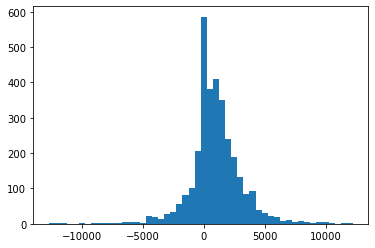

In [13]:
#uni_mixed_gender = uni[((uni.UGDS_WOMEN*uni.UGDS > 100) & (uni.UGDS_MEN*uni.UGDS > 100))]
uni_debt = uni.dropna()
uni_debt['FEMALE_DEBT_DIFF'] = uni_debt.FEMALE_DEBT_MDN - uni_debt.MALE_DEBT_MDN
uni_debt['GEN_DEBT_DIFF'] = uni_debt.FIRSTGEN_DEBT_MDN - uni_debt.NOTFIRSTGEN_DEBT_MDN

plt.hist(uni_debt.FEMALE_DEBT_DIFF, bins=50)

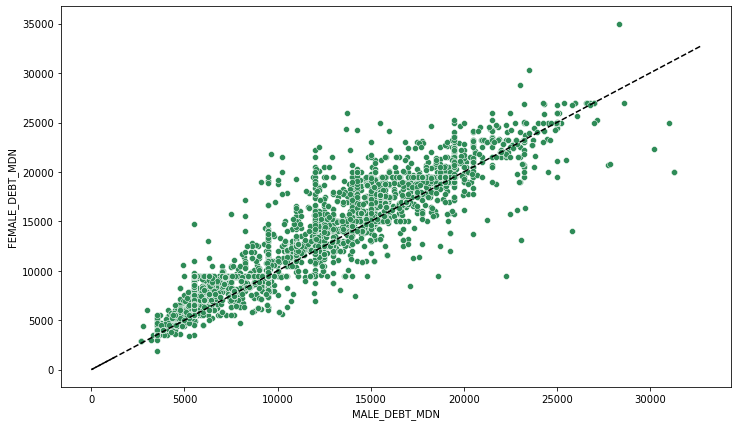

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(data=uni_debt, x='MALE_DEBT_MDN', y='FEMALE_DEBT_MDN', color='seagreen')
x = np.linspace(ax.get_xlim(), 2)
ax.plot(x, x, '--k')

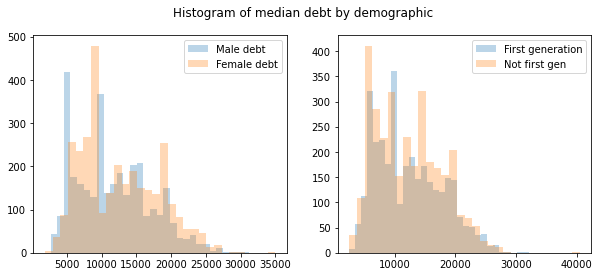

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Histogram of median debt by demographic')
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=30)

ax1.hist(uni_debt.MALE_DEBT_MDN, label='Male debt', **kwargs)
ax1.hist(uni_debt.FEMALE_DEBT_MDN, label='Female debt', **kwargs)
ax1.legend()

ax2.hist(uni_debt.FIRSTGEN_DEBT_MDN, label='First generation', **kwargs)
ax2.hist(uni_debt.NOTFIRSTGEN_DEBT_MDN, label='Not first gen', **kwargs)
ax2.legend()

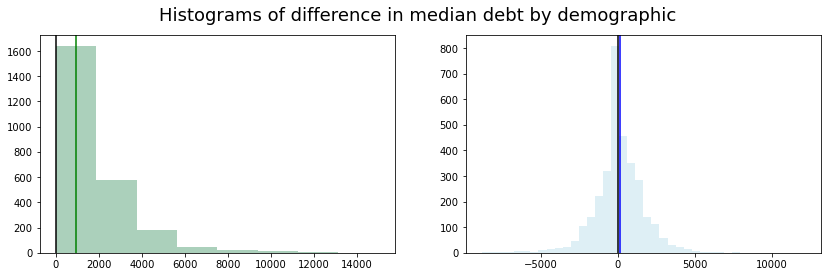

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
fig.suptitle('Histograms of difference in median debt by demographic', fontsize=18)

ax1.hist(uni_debt.FEMALE_DEBT_DIFF, color='seagreen', alpha=0.4, bins=np.linspace(start=0, stop=15000, num=9))
ax1.axvline(0, color='k')
ax1.axvline(uni_debt.FEMALE_DEBT_DIFF.mean(), color='green')

ax2.hist(uni_debt.GEN_DEBT_DIFF, color='lightblue', alpha=0.4, bins=40)
ax2.axvline(0, color='k')
ax2.axvline(uni_debt.GEN_DEBT_DIFF.mean(), color='blue')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fddabb6e850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddabb6edf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddabb6e580>,
 'medians': [<matplotlib.lines.Line2D at 0x7fddabb783d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fddabb786a0>,
 'means': []}

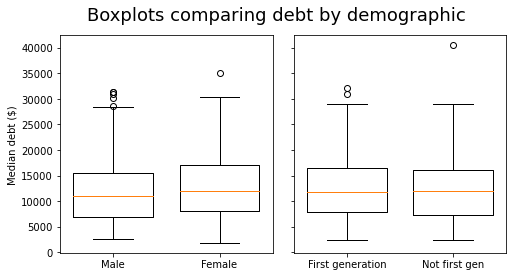

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)
fig.suptitle('Boxplots comparing debt by demographic', fontsize=18)
fig.subplots_adjust(wspace=0.1)

ax1.boxplot([uni_debt.MALE_DEBT_MDN, uni_debt.FEMALE_DEBT_MDN], labels=['Male', 'Female'], widths=0.75)
ax1.set_ylabel('Median debt ($)')
ax2.boxplot([uni_debt.FIRSTGEN_DEBT_MDN, uni_debt.NOTFIRSTGEN_DEBT_MDN], labels=['First generation', 'Not first gen'], widths=0.75)

# Emily's Questions

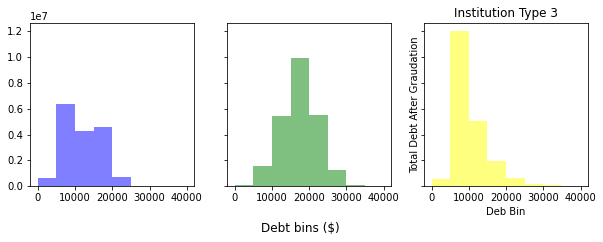

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,3), sharey=True)
fig.supxlabel('Debt bins ($)', y=-0.1)

x = uni[uni['CONTROL'] == 1]['DEBT_MDN']
y = uni[uni['CONTROL'] == 2]['DEBT_MDN']
z = uni[uni['CONTROL'] == 3]['DEBT_MDN']

num_bins = 15
bins=np.linspace(start=0, stop=40000, num=9)

ax1.hist(x, bins, facecolor='blue', alpha=0.5, weights=x)
ax2.hist(y, bins, facecolor='green', alpha=0.5, weights=y)
ax3.hist(z, bins, facecolor='yellow', alpha=0.5, weights=z)

plt.ylabel('Total Debt After Graudation')
plt.xlabel('Deb Bin')
plt.title(f"Institution Type 3")

plt.show()
